Name: Saleh Abdallah

Case Study: As a loan provider, the aim is to implement a model to pre-approve loans to eligible customers to mitigate risk.

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

Data Loading

In [167]:
df = pd.read_csv("loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Cleaning

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [169]:
df.describe().round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


In [170]:
# Drop ID column
df.drop(columns = ['Loan_ID'], inplace = True)

In [171]:
# Check for missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [172]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [173]:
# Handle missing values
df['Dependents'] = df['Dependents'].replace('3+', 3)

for i in ['Gender', 'Married', 'Self_Employed']:
    df[i].fillna(df[i].mode()[0], inplace=True)

for i in ['Dependents', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    df[i].fillna(df[i].median(), inplace=True)

In [174]:
# Verify missing values
df.isnull().sum().sum()

0

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [176]:
# Convert data type
df['Dependents'] = df['Dependents'].astype(int)
df['Dependents'].dtype

dtype('int32')

In [177]:
# Check for duplicates
df.duplicated().sum()

0

EDA

Univariate Analysis

In [188]:
numeric_data=df.select_dtypes(('float64','int64'))
numeric_data


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


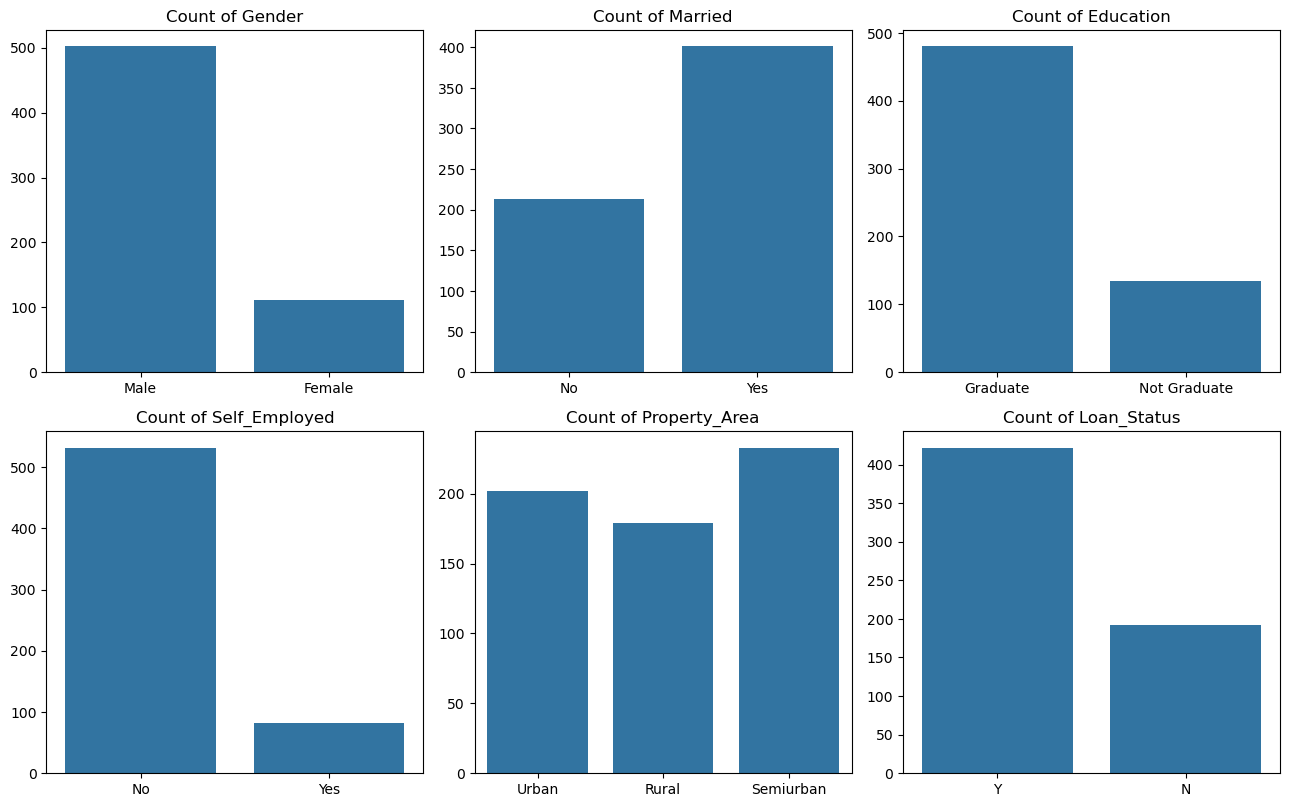

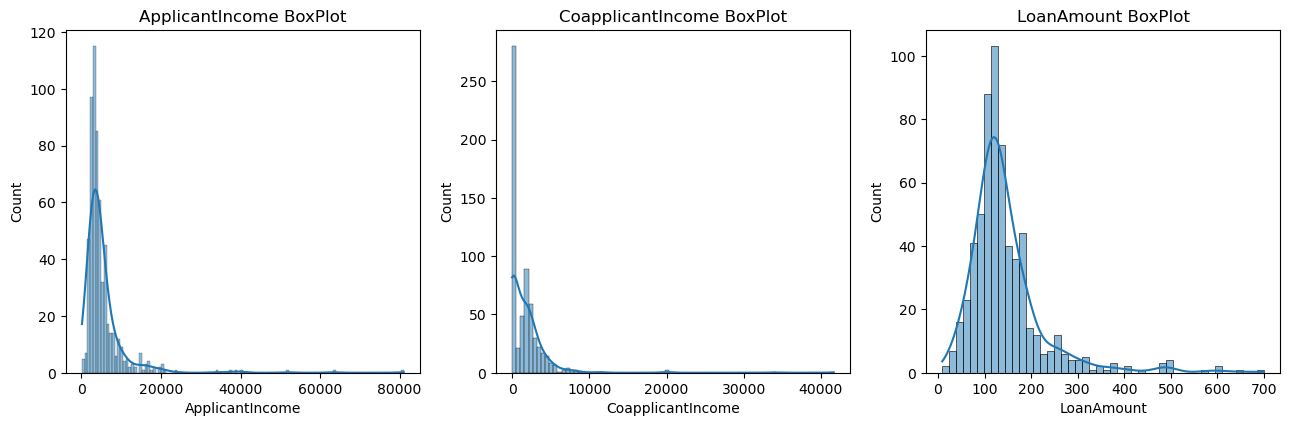

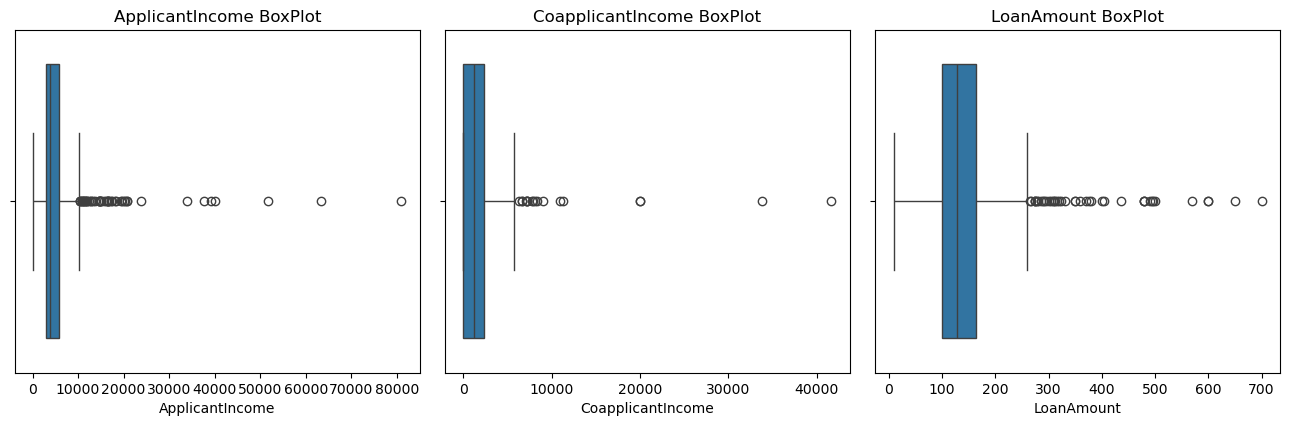

In [208]:
# Categorical features
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
# Count plot
plt.figure(figsize=(13, 32))
for i, x in enumerate(categorical_cols):
    plt.subplot(8, 3, i+1)
    sns.countplot(data=df, x=x)
    plt.title(f'Count of {x}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

# Numerical features
numerical_cols = df.select_dtypes(('float64','int64'))
numerical_cols.drop(columns=['Loan_Amount_Term', 'Credit_History'], inplace=True)

# Histogram
plt.figure(figsize=(13, 32))
for i, x in enumerate(numerical_cols):
    plt.subplot(8, 3, i+1)
    sns.histplot(numerical_cols[x],kde=True)
    plt.title(f'{x} BoxPlot')
plt.tight_layout()
plt.show()
    
# BoxPlot
plt.figure(figsize=(13, 32))
for i, x in enumerate(numerical_cols):
    plt.subplot(8, 3, i+1)
    sns.boxplot(x=numerical_cols[x], data=df)
    plt.title(f'{x} BoxPlot')
plt.tight_layout()
plt.show()

Insight: The data is skewed and there is a clear presence of outliers across the income and loan amount as shown in the plots

Bivariate Analysis

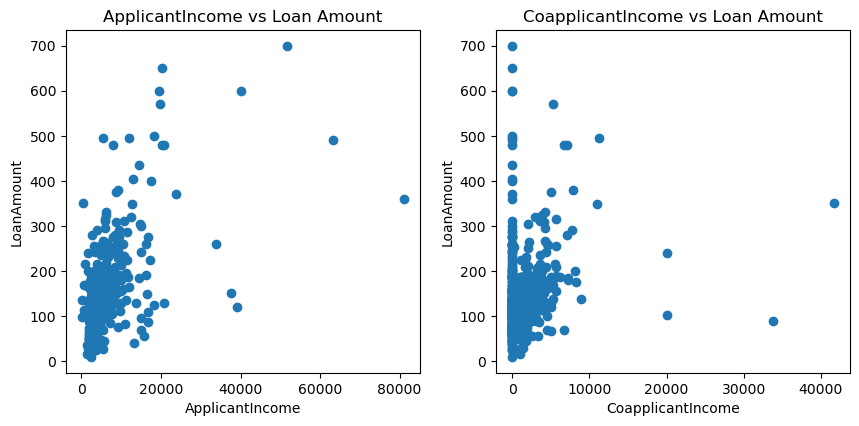

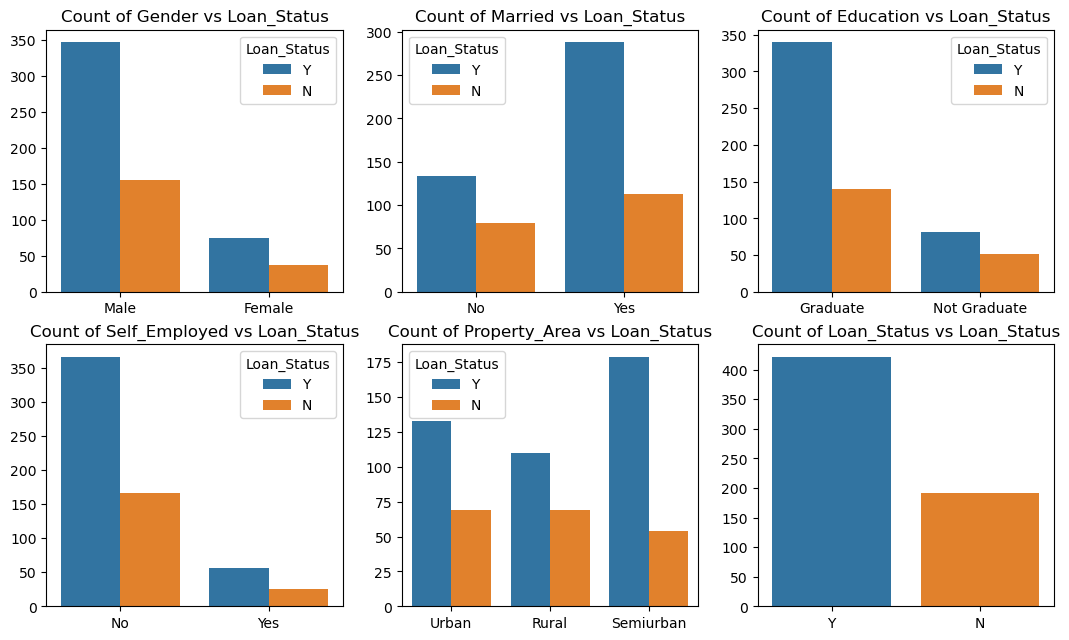

In [ ]:
# Data Visualization
# Income vs Loan Amount
def data_viz(df, income):
    plt.figure(figsize=(13, 32))
    for i, x in enumerate(income):
        plt.subplot(8, 3, i+1)
        plt.scatter(df[x], df['LoanAmount'])
        plt.title(f'{x} vs Loan Amount')
        plt.xlabel(x)
        plt.ylabel('LoanAmount')
    plt.tight_layout()
    plt.show()

data_viz(df, ['ApplicantIncome', 'CoapplicantIncome'])

# Categorical vs Loan Status
plt.figure(figsize=(13, 32))
for i, x in enumerate(categorical_cols):
    plt.subplot(8, 3, i+1)
    if i != 'Loan_Status':
        sns.countplot(data=df, x=x, hue='Loan_Status')
        plt.title(f'Count of {x} vs Loan_Status')
        plt.xlabel('')
        plt.ylabel('')

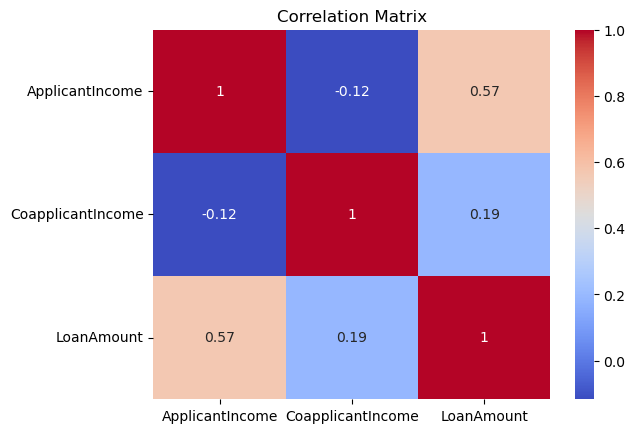

In [180]:
# Correlation matrix
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Insight: There is a higher correlation between the loan amount and the applicant income than the loan amount and the coapplicant income.

Data Preprocessing

In [181]:
# Data Splitting
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Encoding

In [182]:
# Feature Encoding
for i in categorical_cols:
    le = LabelEncoder()
    if i != 'Loan_Status':
        X_train[i] = le.fit_transform(X_train[i])
        X_test[i] = le.transform(X_test[i])  
    
# Target Encoding
target_le = LabelEncoder()
y_train = target_le.fit_transform(y_train)
y_test = target_le.transform(y_test)

Scaling

In [183]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']
scaler = RobustScaler()  # less sensitive to outliers unlike minmax and standard scalar
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Model Training & Evaluation

In [184]:
# Logistic Regression, Decision Tree & Random Forest 
classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier() 
}

Name: Logistic Regression
Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



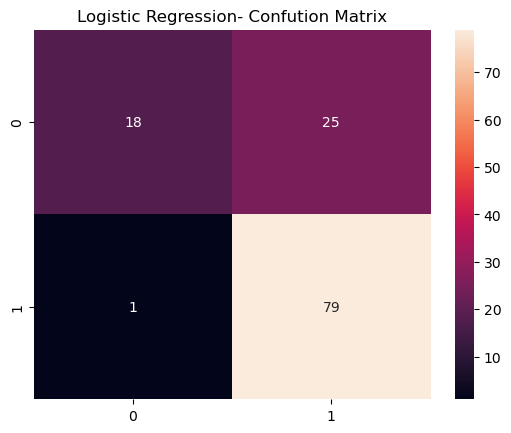

Name: Decision Tree Classifier
Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.59      0.56      0.57        43
           1       0.77      0.79      0.78        80

    accuracy                           0.71       123
   macro avg       0.68      0.67      0.67       123
weighted avg       0.70      0.71      0.71       123



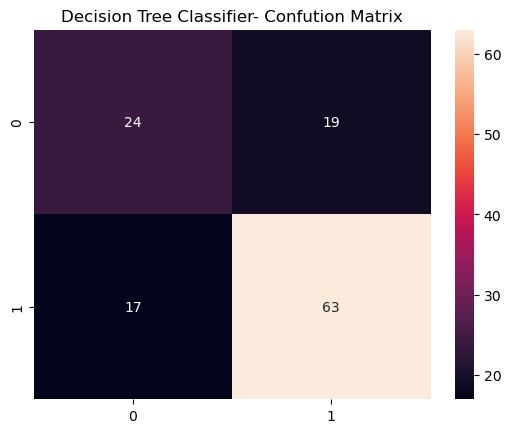

Name: Random Forest Classifier
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



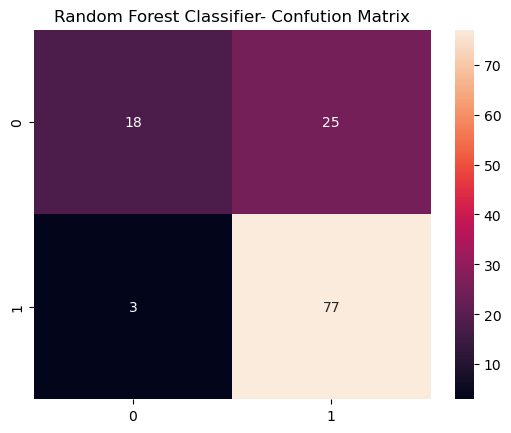

In [185]:
# Model training, prediction & evaluation
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f"Name: {name}")
    print(f"Accuracy: {accuracy:.2f}")  
    print(classification_report(y_test, pred)) 
    # Plot confusion matrix    
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True)
    plt.title(f'{name}- Confution Matrix')
    plt.show()

Interpretation of Results

With the priority being to avoid giving loans to risky customers, the focus is to minimize the false positives, i.e. aim for high precision for approved loans. In addition, we do not want to miss or disqualify eligible customers so false negatives should be minimized, i.e. high recall for rejected loans. In this context, the decision tree model is performing the best compared to the other models with the higher precision of ~77% and recall of ~56% for approved and rejected loans respectively.

Deployment and Monitoring

The best-performing Decision Tree model can be deployed via a Flask or FastAPI REST API, hosted on a secure server or cloud platform. Incoming loan application data will be preprocessed and passed to the model for real-time predictions.

Key risks include latency, input data inconsistencies, and performance degradation over time. These are mitigated through input validation, data pipelines, and routine retraining.

Monitoring includes tracking prediction accuracy, false positives, and data quality in real-time, with alerts and dashboards. Maintenance involves retraining with fresh data, versioning models, and continuous performance evaluation.